This is a Machine Learning technique using decision tree to build a program that can predict whether a given passenger would have survived the RMS Titanic disaster of 1912.

Steps by step approach
** Set up the libraries 
** Exploratory Analysis of the Titanic dataset
** Prepare and clean the data
** Split the dataset into training and test data
** Employ decision tree classification alogorithm
** Evaluate the model performance and accuracy 
** Use the model for prediction

In [4]:
# Set up the libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, tree, preprocessing, metrics


In [6]:
## Exploratory Analysis of the Titanic dataset
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
print("Avg survival rate: " + str(titanic_df['survived'].mean()))
print("Passengers Count: " + str(titanic_df['name'].count()))
# Only 38% of the passengers survived

Avg survival rate: 0.3819709702062643
Passengers Count: 1309


In [15]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


** Passengers in first class had a 61.9% chance of survival compared to a 25.5% chance for those in 3rd class. 
** More younger peoplethe lower classes 
** Ticket prices for first class was much higher than those for second and third class. 
** The average ticket price for first class (£87.5)

In [18]:
groupby_class_sex = titanic_df.groupby(['pclass','sex']).mean()
groupby_class_sex

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

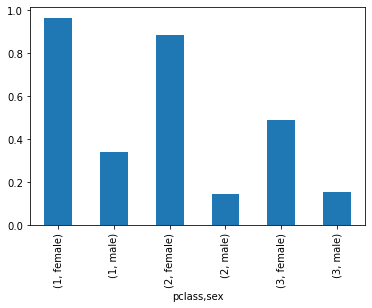

In [19]:
groupby_class_sex['survived'].plot.bar()

** females had a higher chance of survial than males

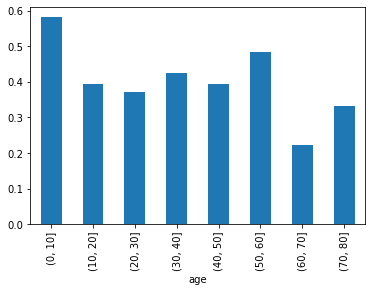

In [22]:
group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()


** children had a higher chance of survial approx 60%

In [23]:
# Preparing and clean the data (drop rows with high missing, NA and non-categorical values) 
# Also format categorical values using sklearn preprocessing label encoder 
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [24]:
titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)

In [25]:
titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")

In [26]:
titanic_df = titanic_df.dropna()

In [27]:
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [28]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df

processed_df = preprocess_titanic_df(titanic_df)

In [62]:
processed_df.embarked

0       2
1       2
2       2
3       2
4       2
       ..
1301    0
1304    0
1306    0
1307    0
1308    2
Name: embarked, Length: 1043, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [70]:
clf_dt = tree.DecisionTreeClassifier(max_depth=5)

In [73]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.7894736842105263

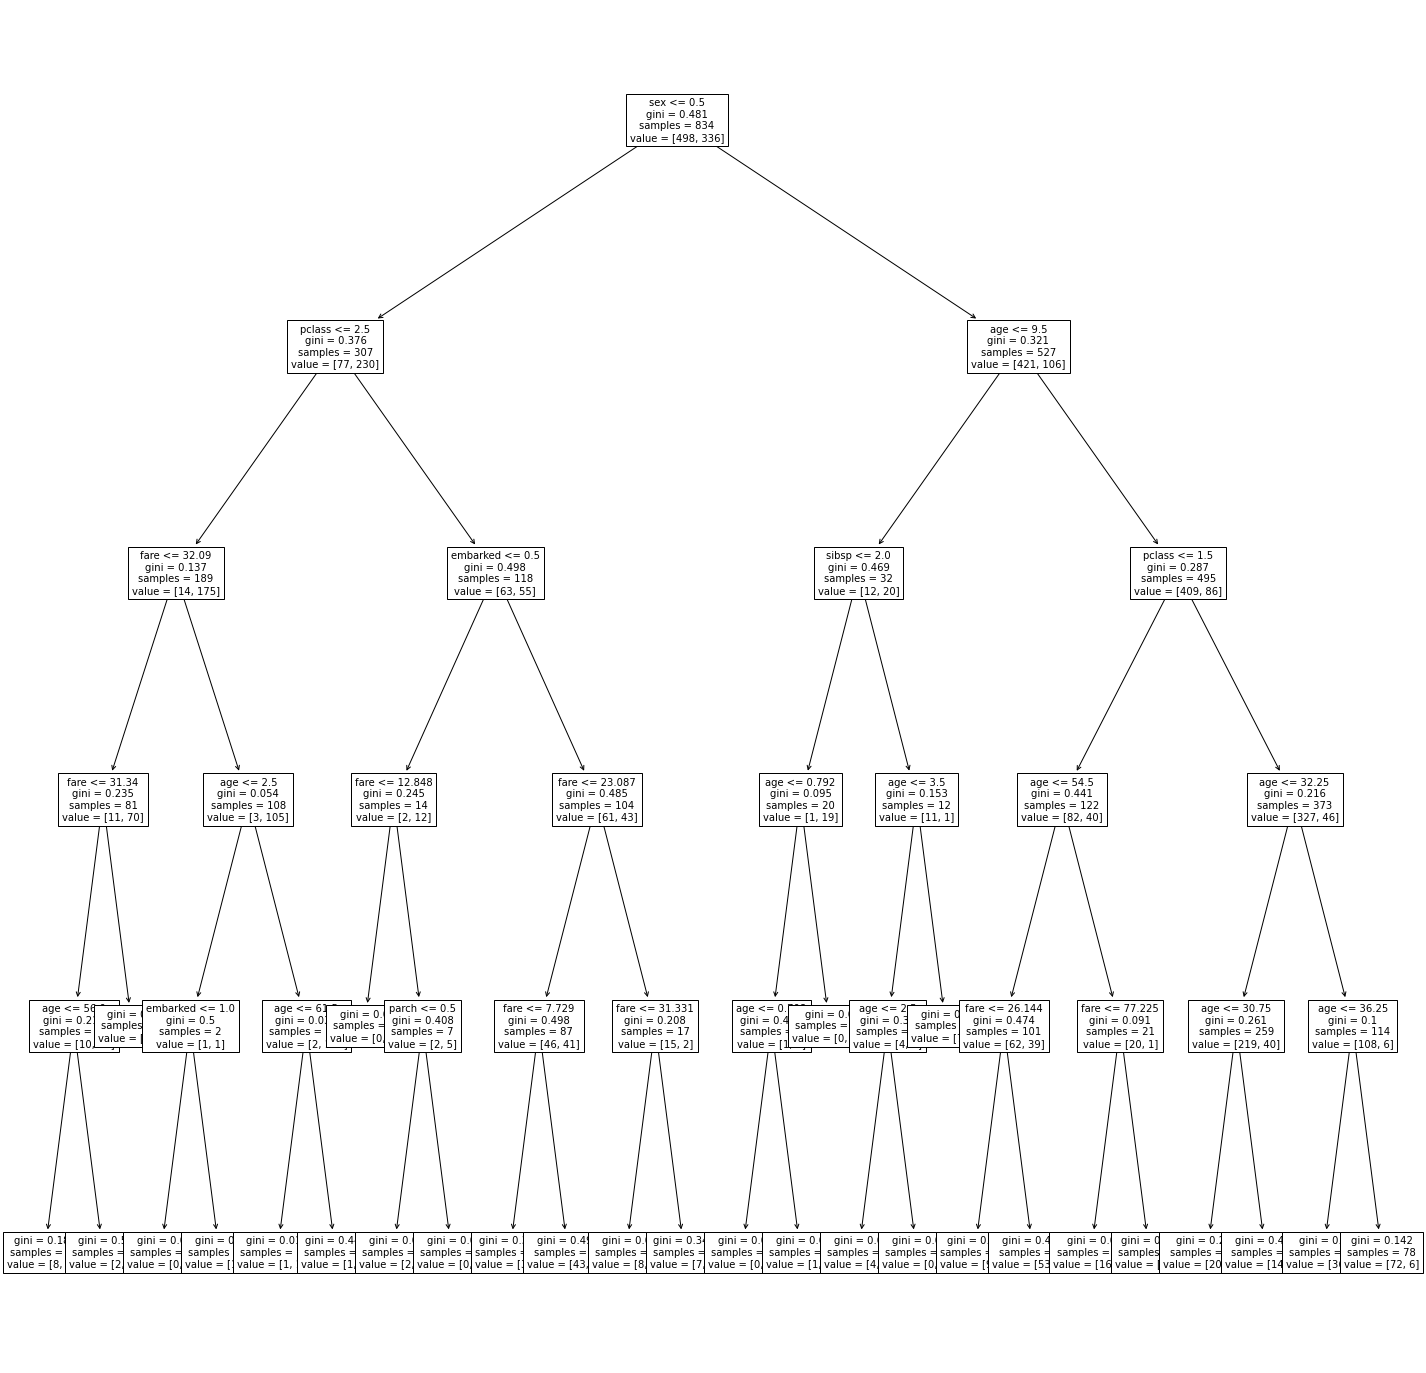

In [79]:
plt.figure(figsize=(25,25))
tree.plot_tree(clf_dt, fontsize=10, feature_names= list(processed_df.drop(['survived'], axis=1)))
plt.show()

In [80]:
y_pred = clf_dt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7894736842105263
